In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
# Tamaño de casas (m²)
X = np.array([50, 60, 70, 80, 90, 100]).reshape(-1, 1)

# Precio de casas (en miles)
y = np.array([150, 180, 210, 240, 270, 300])

In [65]:
#datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [67]:
#modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
#predicciones
y_pred = modelo.predict(X_test)

In [71]:
#evaluacion
error = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", error)
r2=r2_score(y_test, y_pred)
print("Valor de R²:", r2)

Error cuadrático medio: 8.077935669463161e-28
Valor de R²: 1.0


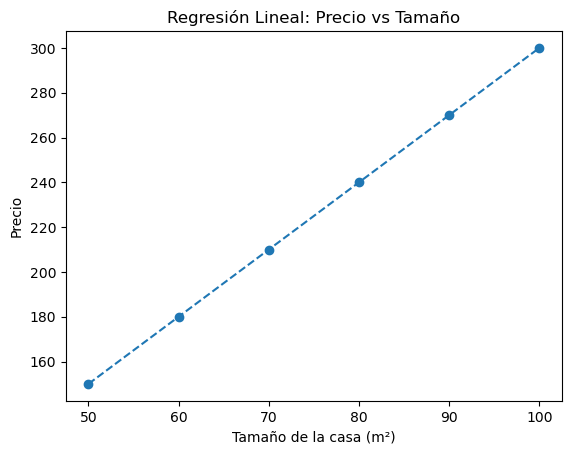

In [73]:
#grafico
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), linestyle='--')
plt.xlabel("Tamaño de la casa (m²)")
plt.ylabel("Precio")
plt.title("Regresión Lineal: Precio vs Tamaño")
plt.show()

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [77]:
#data
iris = load_iris()

X = iris.data          # Variables independientes
y = iris.target        # Etiquetas (clases)


In [79]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [81]:
#exploracion
df = pd.DataFrame(X, columns=iris.feature_names)
df['especie'] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [83]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


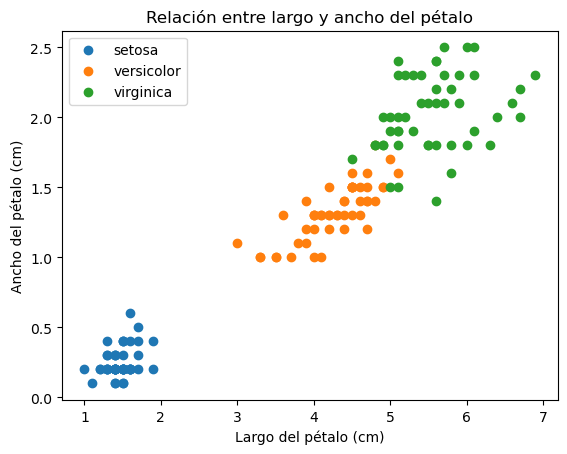

In [85]:
for especie in np.unique(df['especie']):
    subset = df[df['especie'] == especie]
    plt.scatter(
        subset['petal length (cm)'],
        subset['petal width (cm)'],
        label=iris.target_names[especie]
    )

plt.xlabel("Largo del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.title("Relación entre largo y ancho del pétalo")
plt.legend()
plt.show()

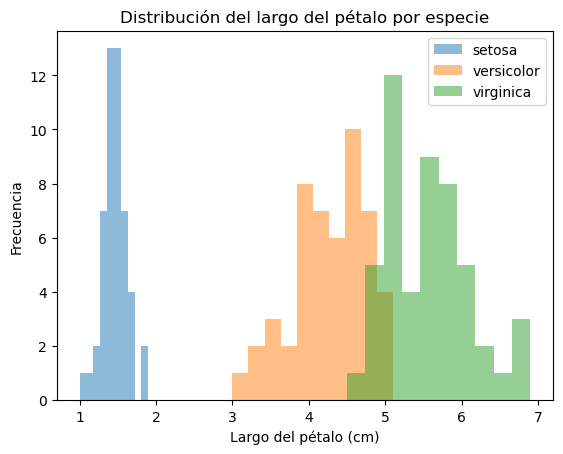

In [87]:
for especie in np.unique(df['especie']):
    datos = df[df['especie'] == especie]['petal length (cm)']
    plt.hist(datos, alpha=0.5, label=iris.target_names[especie])

plt.xlabel("Largo del pétalo (cm)")
plt.ylabel("Frecuencia")
plt.title("Distribución del largo del pétalo por especie")
plt.legend()
plt.show()

In [89]:
#division train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [91]:
#entrenamiento de modelo
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [93]:
#predicciones
y_pred = modelo.predict(X_test)

In [95]:
#evaluacion
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


In [97]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



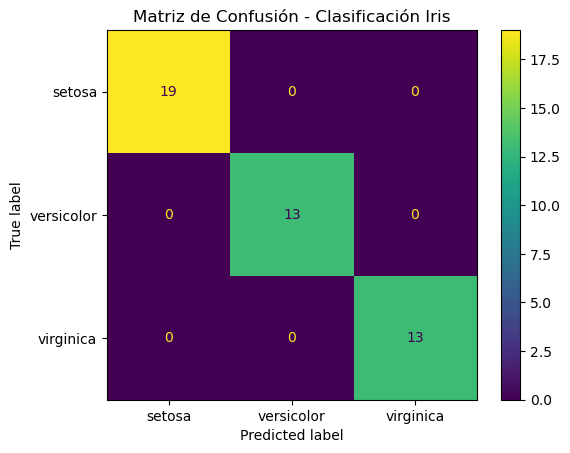

In [99]:
matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=matriz,
    display_labels=iris.target_names
)

disp.plot()
plt.title("Matriz de Confusión - Clasificación Iris")
plt.show()

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [115]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

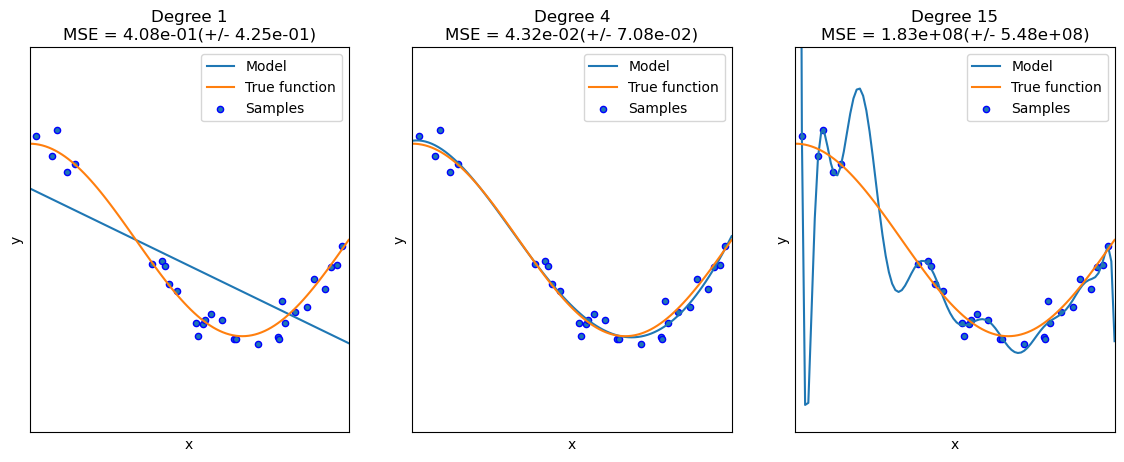

In [117]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
   
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

plt.show()